In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas_datareader as pdr
from statsmodels.stats.stattools import jarque_bera

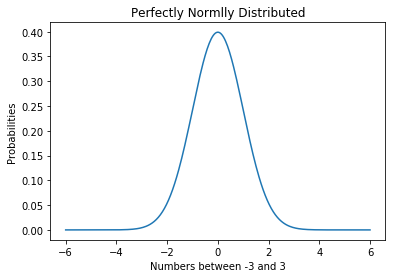

In [10]:
xs = np.linspace(-6,6,300) #using the linspace function in numpy to generate 300 linearly spaced numbers as data
normal = stats.norm.pdf(xs) # turning the distribution of xs into a normal one
plt.plot(xs,normal)
plt.xlabel('Numbers between -6 and 6')
plt.ylabel('Probabilities')
plt.title('Perfectly Normlly Distributed'); # since we generated a data that is perfectly normally distributed

In [11]:
# creating a lognormal data set
xs2=np.linspace(stats.lognorm.ppf(0.01,0.7,loc=-0.1),stats.lognorm.ppf(0.99,0.7,loc=-0.1),150)

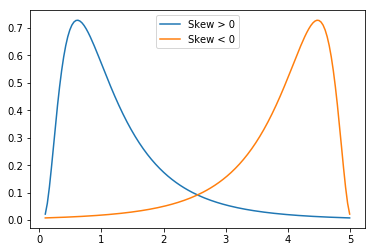

In [12]:
lognormal = stats.lognorm.pdf(xs2,0.7) 
plt.plot(xs2, lognormal, label='Skew > 0')
plt.plot(xs2,lognormal[::-1], label='Skew < 0') # lognormal is inversed to have a mirror image of skew > 0
plt.legend();

In [13]:
df = pdr.get_data_yahoo('SPY', start = '2012-1-1', end = '2015-1-1') # getting data from yahoo API

In [14]:
ret = df.pct_change()[1:] # calculates percentage change for a pandas dataframe
skew = stats.skew(ret) # calculates skew using scipy stats 
avg=np.mean(ret) # general syntax for calculating mean in numpy
median = np.median(ret) # general syntax for calculating median in numpy

In [15]:
print(skew)
print(avg,median) # printing out the results

[ 0.5108849   0.12507093  0.08326245 -0.19961085  1.28981664 -0.20965582]
High         0.000654
Low          0.000650
Open         0.000664
Close        0.000660
Volume       0.051549
Adj Close    0.000741
dtype: float64 0.0007962087332430423


Excess kurtosis of leptokurtic distribution: 3.0
Excess kurtosis of mesokurtic distribution: 0.0
Excess kurtosis of Platykurtic distribution: -0.5937628755982794


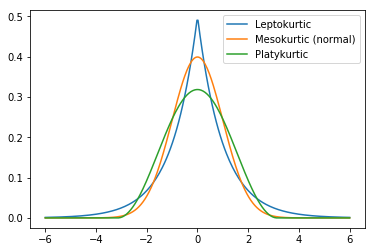

In [16]:
plt.plot(xs,stats.laplace.pdf(xs),label = 'Leptokurtic') # we convert the xs data set into laplace probability distribution
print('Excess kurtosis of leptokurtic distribution:', (stats.laplace.stats(moments='k'))) # we pull and print out kurtosis
plt.plot(xs,normal,label='Mesokurtic (normal)') # Normal distribution to compare with leptokurtic and platykurtic
print('Excess kurtosis of Mesokurtic distribution:',(stats.norm.stats(moments='k')))
plt.plot(xs,stats.cosine.pdf(xs),label = 'Platykurtic') # since cosine probability function is less tighter
print('Excess kurtosis of Platykurtic distribution:',(stats.cosine.stats(moments='k'))) 
plt.legend();

In [17]:
print('S&P 500 kurtosis', stats.kurtosis(ret)) # syntax for getting kurtosis for a data

S&P 500 kurtosis [6.64063683 2.09381381 1.74686519 1.16248991 2.83626928 1.20587438]


In [24]:
N=1000 # this is an attept to arrive at pvalues using jarque_bera
M=1000
pvalues = np.ndarray((N)) # creates an numpy array of size N (1000) alternatively can use np.zeros
for i in range(M): #for loop to generate 1000 data sets and pvalues
    x = np.random.normal(0,1,M) # generates 1000 data sets with normal distribution
    _, pvalue,_,_ = jarque_bera(x) #calculates pvalues
    pvalues[i] = pvalue #assigns it to the array created above
signi_num = len(pvalues[pvalues < 0.05]) #finding the length to calculate the proportion
print(float(signi_num/N))   # prints out the proportion for verifcation 

0.055
